목적함수란? 어떤 벡터 변수(혹은 행렬)이 있을때, 그 벡터 변수가 어느 영역R에 속한다고 할때, 벡터변수를 매개변수로 갖는 함수f(x)의 최댓값, 최솟값을 주는 문제를 선형계획문제라하는데,여기서 함수 f를 목적함수라한다.


In [1]:
import numpy as np

In [70]:
class AdalineGD(object):
    def __init__(self,eta=0.01, n_iter=50, random_state=1):# eta: float(학습률),n_iter: 데이터셋 반복회수, random_state:가중치 무작위 초기화를 위한 난수 생성기 시드 
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
        #w_: 학습된 가중치
        #cost_: 학습률마다 누적된 비용 함수의 제곱합
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        
        self.cost_ =[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta *X.T.dot(errors)
            self.w_[0]+=self.eta * errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):# 최종 입력 계산
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,X): # 선형 활성화 계산
        return X
    def predict(self,X):# 단위 계단 함수를 사용하여 클래스 레이블을 반환
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)

#### 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋 기반으로 가중치를 계산.
#### 절편(0번째 가중치)은 self.eta * errors.sum() 이고
#### 가중치 1에서 m까지는 self.eta * X.T.dot(errors) -----X.T.dot(errors)는 특성 행렬과 오차 벡터 간의 행렬-벡터 곱셈이다.
#### activation은 항등 함수 ---단일층 신경망을 통해 정보가 어떻게 흘러가는지 표시하려고 (activation 메서드에서 계산되는) 활성화 함수를 추가
#### 입력 데이터의 특성에서 최종 입력, 활성화 , 출력순으로 진행

In [71]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)

In [92]:
y=df.iloc[0:100,4].values

In [93]:
y=np.where(y=='Iris-setosa',-1,1)

In [94]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [75]:
X=df.iloc[0:100,[0,2]].values

In [76]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [77]:
import matplotlib.pyplot as plt

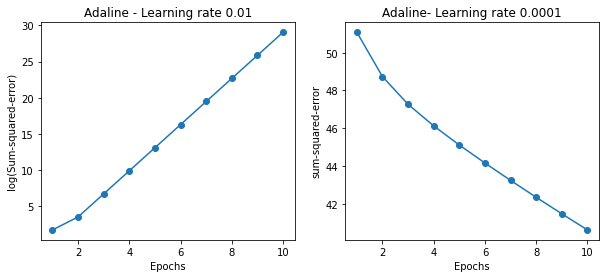

In [78]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1=AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2=AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('sum-squared-error')
ax[1].set_title('Adaline- Learning rate 0.0001')
plt.show()


#### 왼쪽은 학습률이 클때 발생, 비용 함수를 최소화하지 모하고 오차는 에포크마다 점차 커니다. 전역 최솟값을 지나쳤기 때문
#### 오른쪽은 비용이 감소하지만 학습률이 너무 작기 때문에 알고리즘 전역 최솟값에 수렴하려면 많은 에포크가 필요

In [79]:
X.T

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7],
       [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
        4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
        4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5.

#### 표준화-- 표준 정규 분포의 성질을 부여하여 경사 하강법 학습이 좀더 빠르게 수렴되도록 돕는다.
#### 표준화는 각 특성의 평균을 0에 맞추고 특성의 표준 편차를 1로 만든다.
#### 표준화는 넘파이 함수 mean과 std로 간단하기 처리가능

In [80]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [95]:
X_std=np.copy(X)

In [82]:
X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [96]:
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()

In [97]:
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

In [98]:
X_std[:]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

In [86]:
X_std[1]

array([-0.89430898, -1.01435952])

In [87]:
X_std[10]

array([-0.11120129, -0.94497788])

In [88]:
from matplotlib.colors import ListedColormap

In [99]:
def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))]) # unique=> 유일한 값
    
    x1_min,x1_max=X[:,0].min() -1, X[:,0].max()+1
    x2_min,x2_max=X[:,1].min() -1, X[:,0].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    #meshgird_Page
    #https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
    
    
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    # ravel 메서드는 입력된 배열을 1차원으로 펼친다.
    #그 다음 펼쳐진 두개의 배열을 행으로 붙여서 하나의 행렬을 만든다.
    # 마지막으로 행렬을 전치(.T속성)하여 두 개의 열이 되도록 바꾼다. 이두열을 xy평면의 좌표값
    
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    # contoruf함수로 동고선 그래프를 그린다.
    
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,edgecolor='black')

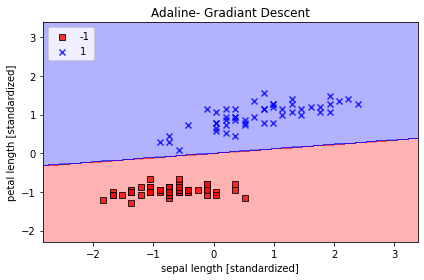

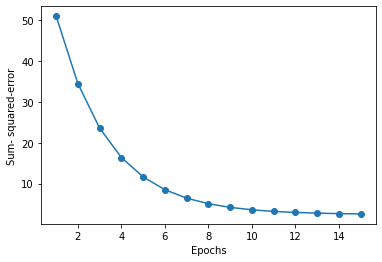

In [100]:
ada=AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)

plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline- Gradiant Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada.cost_) +1), ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum- squared-error')
plt.show()

## 확률적 경사하강법 = 온라인 경사하강법
##### 모든 샘플에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 각 훈련 샘플에 대해서 조금씩 가중치를 업데이트한다.

아달린  학습 알고리즘안에 있는 fit메서드 안에서 각 훈련 샘플에 대해 가중치를 업데이트한다. 추가로 partial_fit 메서드도 구현가능, 가중치를 다시 초기화하지 않아 온라인 학습에서 사용할수 있다. 훈련 후에는 알고리즘이 수렴하는지 확인하려고 에포크마다 훈련 샘플의 평균 비용을 계산. 비용 함수를 최적화할때 반복적인 순환이 일어나지 않도록 매 에포크가 일어나기 전에 훈련 샘플을 섞는 옵션추가. random_state매개변수로 재현 가능하다로고 랜덤 시드 지정할수 있다.

In [108]:
class AdalineSGD(object):
    def __init__(self,eta=0.01,n_iter=10,shuffle=True, random_state=None):
        self.eta=eta
        self.n_iter=n_iter
        self.w_initialized=False
        self.shuffle=shuffle
        self.random_state=random_state
        
        
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X,y= self._shuffle(X,y)
            cost=[]
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    
    def partial_fit(self,X,y):
        #가중치를 다시 초기화 하지않고 훈련 데이터를 학습
        if not self.w_initialized:
            self._initialze_weights(X.shape[1])
        if y.ravel().shape[0] >1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
    
    
    def _shuffle(self,X,y):
        r=self.rgen.permutation(len(y))
        return X[r],y[r]
    '''
    np.random함수의 permutation 함수로 0에서 100까지 중볻되지 않는 랜덤한 숫자로 숫자 시퀀스
    를 생성, 이 숫자 시퀀스를 특성 행렬과 클래스 레이블 벡터를 섞는 인덱스로 사용
    '''
    
    def _initialize_weights(self,m):
        # 랜덤한 작은 수로 가중치를 초기화
        self.rgen=np.random.RandomState(self.random_state)
        self.w_=self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized=True
        
        
    def _update_weights(self,xi,target):
        # 아달린 학습 규칙으르 적용하여 가중치를 업데이트
        output=self.activation(self.net_input(xi))
        error=(target-output)
        self.w_[1:]+= self.eta *xi.dot(error)
        self.w_[0]+=self.eta *error
        cost=0.5 * error**2
        return cost
    
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    
    def activation(self,X):
        return X
    
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)

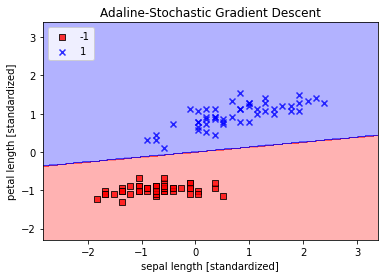

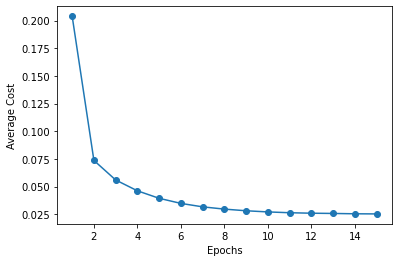

In [113]:
ada=AdalineSGD(n_iter=15,eta=0.01, random_state=1)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline-Stochastic Gradient Descent")
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()